In [139]:
import numpy as np
import ast
import pandas as pd

df = pd.read_csv("owl_scores.csv").rename({"index": "image"}, axis=1)

for col in df.filter(like="description_score").columns.tolist():
    df[f"{col}_mean"] = df[col].apply(lambda scores: np.mean(ast.literal_eval(scores))).mean()

In [140]:
df.columns

Index(['image', 'llava_description', 'kosmos_description',
       'first_llama_description', 'final_description',
       'final_llama2_description', 'llava_description_score',
       'final_description_score', 'final_llama2_description_score',
       'first_llama_description_score', 'kosmos_description_score',
       'llava_description_phrases', 'final_description_phrases',
       'first_llama_description_phrases', 'kosmos_description_phrases',
       'final_llama2_description_phrases', 'llava_description_score_mean',
       'final_description_score_mean', 'final_llama2_description_score_mean',
       'first_llama_description_score_mean', 'kosmos_description_score_mean'],
      dtype='object')

In [141]:
df.llava_description_score_mean.mean(),\
df.final_description_score_mean.mean()

(0.0365605542109433, 0.04125919565508539)

In [142]:
df.filter(like="score_mean").mean().sort_values()

llava_description_score_mean           0.036561
first_llama_description_score_mean     0.038199
kosmos_description_score_mean          0.040205
final_llama2_description_score_mean    0.040640
final_description_score_mean           0.041259
dtype: float64

In [143]:
df["image"][0]

'/workspace/Russian-military-annotated-4/train/null--67-_jpg.rf.a8548fcfd4b340b7022f764da9e44a9d.jpg'

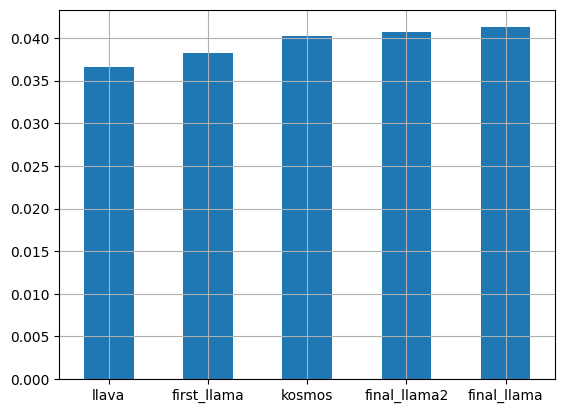

In [144]:
import matplotlib.pyplot as plt
tmp = df.filter(like="score_mean").mean().sort_values()
tmp.index = ["llava", "first_llama", "kosmos", "final_llama2", "final_llama"]
ax = tmp.plot(kind="bar", rot=0)
ax.grid()

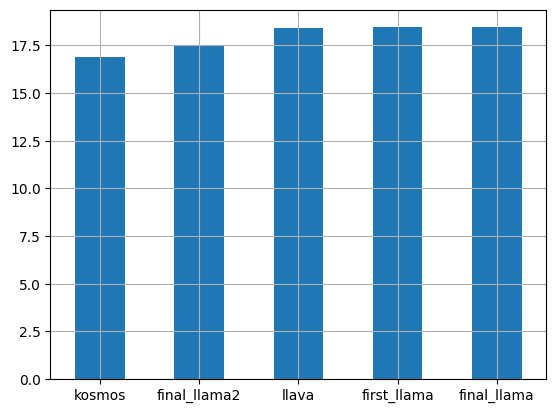

In [145]:
clip_score_df = pd.read_csv("clip_score.csv", index_col=[0, 1])
tmp = clip_score_df.mean().sort_values()
tmp.index = ["kosmos", "final_llama2", "llava", "first_llama", "final_llama"]
ax = tmp.plot(kind="bar", rot=0)
ax.grid()

In [146]:
clip_score_df.mean().sort_values()

kosmos_description          16.894648
final_llama2_description    17.543396
llava_description           18.413016
first_llama_description     18.451600
final_description           18.458043
dtype: float64

In [147]:
df["llava_description_phrases"] = df.llava_description_phrases.apply(lambda x: ast.literal_eval(x))
df["final_description_phrases"] = df.final_description_phrases.apply(lambda x: ast.literal_eval(x))


df["final_description_phrases"].explode().value_counts()[10:20] 


df["llava_description_phrases"].explode().value_counts()[10:20]

llava_description_phrases
the left side       237
addition            226
it                  184
the center          178
them                177
they                172
others              169
a dirt road         164
a military scene    155
several people      148
Name: count, dtype: int64

In [148]:
# df["llava_description_phrases"] = df.llava_description_phrases.apply(lambda x: ast.literal_eval(x))
# df.llava_description_phrases

In [149]:
import os
import random
data_dir = r"C:\Users\Gram\Desktop\NULP\uav_img_cap\notebooks\Russian-military-annotated-4"
improved_descr_image_paths = df[df.llava_score_mean < df.final_score_mean]["image"]\
.apply(lambda path: os.path.join(data_dir, *(path.split("/")[-2:])))

bad_descr_image_paths = df[df.llava_score_mean > df.final_score_mean]["image"]\
.apply(lambda path: os.path.join(data_dir, *(path.split("/")[-2:])))

improved_images = random.choices(improved_descr_image_paths.values.tolist(), k=5)
bad_images = random.choices(bad_descr_image_paths.values.tolist(), k=5)
# + random.choices(bad_descr_image_paths, k=5)
# images

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 3),  
                 axes_pad=0.1,
                 )
for ax, im in zip(grid, improved_images):
    ax.imshow(Image.open(im))
    
plt.show()

AttributeError: 'DataFrame' object has no attribute 'llava_score_mean'

In [ ]:
for col in df.filter(like="phrases").columns.tolist():
    df[col] = df[col].apply(ast.literal_eval)


In [150]:
import os
import random

clip_score_df = pd.read_csv("score_df.csv")

data_dir = r"C:\Users\Gram\Desktop\NULP\uav_img_cap\notebooks\Russian-military-annotated-4"

improved_descr_image_paths = clip_score_df[clip_score_df["llava_description"] < clip_score_df["final_description"]]["index"]\
.apply(lambda path: os.path.join(data_dir, *(path.split("/")[-2:])))

bad_descr_image_paths = clip_score_df[clip_score_df["llava_description"] > clip_score_df["final_description"]]["index"]\
.apply(lambda path: os.path.join(data_dir, *(path.split("/")[-2:])))

improved_images = random.choices(improved_descr_image_paths.values.tolist(), k=5)
bad_images = random.choices(bad_descr_image_paths.values.tolist(), k=5)
# + random.choices(bad_descr_image_paths, k=5)
# images

# clip_score_df[clip_score_df["llava_description"] < clip_score_df["final_description"]]["index"]

FileNotFoundError: [Errno 2] No such file or directory: 'score_df.csv'

In [170]:
pd.DataFrame(json.loads(open(r"C:\Users\Gram\Desktop\NULP\uav_img_cap\processed_data\inference_results_llava_first_step.json", "r").read())).description.apply(lambda x: x.split("ASSISTANT: ")[-1])[20]

'The image captures a military vehicle, specifically a white truck, driving through a muddy field. The truck is equipped with a large exhaust pipe, which suggests that it might be a powerful off-road vehicle. There are two people in the scene, one standing closer to the truck and the other further away. Both individuals are wearing uniforms, indicating that they are likely military personnel.\n\nIn addition to the truck, there is a car visible in the background, which might be a part of the military convoy. The environment appears to be a mix of muddy terrain and a dirt road, which is typical for military operations in challenging conditions.'

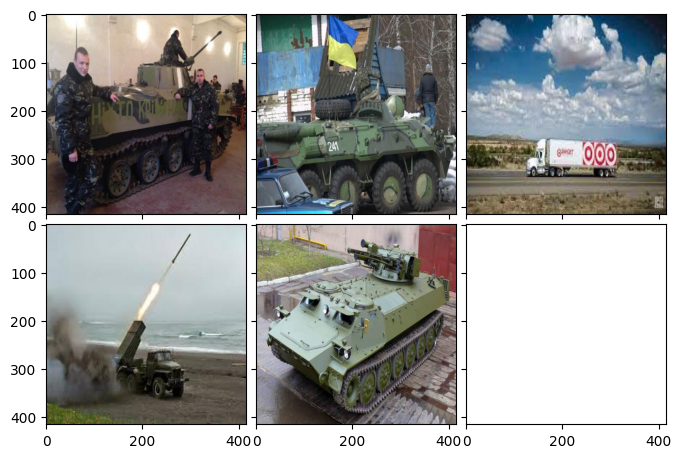

In [149]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 3),
                 axes_pad=0.1,  
                 )
for ax, im in zip(grid, improved_images):
    ax.imshow(Image.open(im))
    
plt.show()

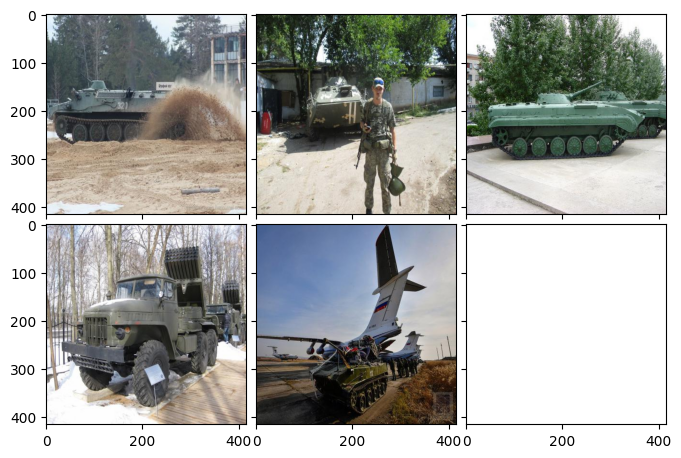

In [150]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 3),
                 axes_pad=0.1,
                 )

for ax, im in zip(grid, bad_images):
    ax.imshow(Image.open(im))

plt.show()

In [16]:
import glob
import json
anot_files = glob.glob(r"C:\Users\Gram\Desktop\NULP\uav_img_cap\notebooks\Russian-military-annotated-4\*\*.json")
ds = []
for anot_file in anot_files:
    ds.append(json.loads(open(anot_file, "r").read()))

In [175]:
cats = pd.DataFrame(ds).categories.values.tolist()[0]

In [59]:
pd.json_normalize(ds[0])

,licenses,categories,images,annotations,info.year,info.version,info.description,info.contributor,info.url,info.date_created
0,"[{'id': 1, 'url': 'https://creativecommons.org...","[{'id': 0, 'name': 'vehicles', 'supercategory'...","[{'id': 0, 'license': 1, 'file_name': 'null--6...",[],2022,4,Exported from roboflow.ai,,https://public.roboflow.ai/object-detection/un...,2022-11-23T22:57:09+00:00


In [120]:
# pd.json_normalize()
im_dfs = []
for d in ds:
    imgs = pd.DataFrame(pd.json_normalize(d)["images"][0])
    cats = pd.DataFrame(pd.json_normalize(d)["annotations"][0])
    if cats.empty:
        continue
    im_dfs.append(pd.concat([imgs.reset_index(drop=True), cats.reset_index(drop=True)], axis=1))

In [180]:
cats = pd.DataFrame(cats).set_index("id")["name"].to_dict()

In [182]:
cat_df = pd.concat(im_dfs, ignore_index=True, axis=1)
cat_df.columns = im_dfs[0].columns.tolist()
cat_df["category"] = cat_df["category_id"].map(cats)

Text(0.5, 0, 'Середній CLIP-score між різними категоріями техніки')

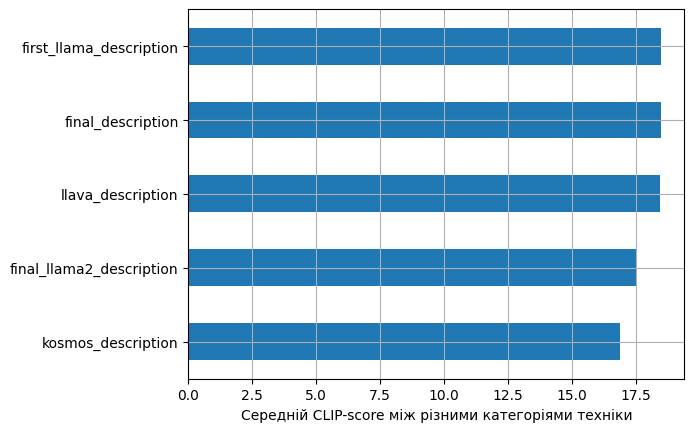

In [216]:
# cat_df.merge(, on="ix")
# clip_score_df["file_name"] = clip_score_df.reset_index()["index"].str.split("/").apply(lambda x: x[-1]).values
# clip_score_df
# cat_df
# clip_score_df

cat_df.merge(clip_score_df, on="file_name").groupby("category")[clip_score_df.filter(like="description").columns.tolist()].mean().mean().sort_values().plot(kind="barh")
plt.grid()
plt.xlabel("Середній CLIP-score між різними категоріями техніки")
# clip_score_df.reset_index()["index"].str.split("/").apply(lambda x: x[-1])
# clip_score_df

In [219]:
cat_df.merge(clip_score_df, on="file_name").groupby("category")[clip_score_df.filter(like="description").columns.tolist()].mean().mean().sort_values()

kosmos_description          16.871177
final_llama2_description    17.518179
llava_description           18.416085
final_description           18.454602
first_llama_description     18.456657
dtype: float64

0.04057200000000094